In [1]:
import numpy as np
import cv2

In [2]:
src = cv2.imread('img/butterfly.jpg')
src

array([[[ 47,  88,  50],
        [ 47,  88,  50],
        [ 48,  87,  49],
        ...,
        [170, 150, 145],
        [172, 151, 154],
        [174, 150, 162]],

       [[ 50,  91,  53],
        [ 48,  89,  51],
        [ 46,  85,  47],
        ...,
        [171, 150, 149],
        [173, 151, 156],
        [174, 151, 165]],

       [[ 53,  94,  56],
        [ 48,  89,  51],
        [ 43,  82,  44],
        ...,
        [168, 149, 152],
        [171, 152, 161],
        [172, 153, 168]],

       ...,

       [[ 43, 123,  58],
        [ 44, 122,  58],
        [ 46, 121,  59],
        ...,
        [103, 223, 218],
        [ 94, 214, 203],
        [ 88, 205, 190]],

       [[ 41, 121,  56],
        [ 42, 120,  56],
        [ 45, 120,  58],
        ...,
        [103, 223, 218],
        [ 95, 217, 206],
        [ 92, 209, 194]],

       [[ 45, 125,  60],
        [ 46, 124,  60],
        [ 49, 124,  62],
        ...,
        [103, 223, 218],
        [ 97, 219, 208],
        [ 96, 213, 198]]

In [3]:
src.shape

(356, 493, 3)

In [4]:
src[0,0]

array([47, 88, 50], dtype=uint8)

In [7]:
dst = np.zeros(src.shape).astype(np.uint8)
dst.shape

(356, 493, 3)

In [8]:
for j in range(src.shape[0]) :
    for i in range(src.shape[1]) :
        p1 = src[j,i]
        p2 = dst[j,i]
        p2[0] = 255-p1[0]
        p2[1] = 255-p1[1]
        p2[2] = 255-p1[2]
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 컬러 스플릿

In [10]:
def color_split():
    src = cv2.imread('img/candies.png', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    # b_plane, g_plane, r_plane = cv2.split(src)
    bgr_planes = cv2.split(src)

    cv2.imshow('src', src)
    cv2.imshow('B_plane', bgr_planes[0])
    cv2.imshow('G_plane', bgr_planes[1])
    cv2.imshow('R_plane', bgr_planes[2])
    cv2.waitKey()
    cv2.destroyAllWindows()


In [11]:
color_split()

In [91]:
import sys
import numpy as np
import cv2


src = cv2.imread('img/pepper.bmp', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # YCrCb

ycrcb_planes = cv2.split(src_ycrcb)



# type(ycrcb_planes), type(ycrcb_planes[0]), src_ycrcb.shape
print(src_ycrcb[0])
src_ycrcb[0] = cv2.add(src_ycrcb[0],100)
print(src_ycrcb[0])
src_BGR = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)
cv2.imshow('src',src)

cv2.imshow('src_ycrcb',src_ycrcb)

cv2.imshow('src_BGR',src_BGR)

cv2.waitKey()
cv2.destroyAllWindows()

[[ 30 179 111]
 [ 58 186 175]
 [ 62 191 175]
 ...
 [ 75 211 175]
 [ 81 216 182]
 [ 57 173 198]]
[[130 255 211]
 [158 255 255]
 [162 255 255]
 ...
 [175 255 255]
 [181 255 255]
 [157 255 255]]


In [52]:
print(ycrcb_planes[0])
ycrcb_planes = list(ycrcb_planes)
ycrcb_planes_G = ycrcb_planes.copy()
ycrcb_planes_R = ycrcb_planes.copy()
# B
ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])
dst_ycrcb = cv2.merge(ycrcb_planes)
dst_B = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)
# BG
ycrcb_planes[1] = cv2.equalizeHist(ycrcb_planes[1])
dst_ycrcb = cv2.merge(ycrcb_planes)
dst_BG = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)
# BGR
ycrcb_planes[2] = cv2.equalizeHist(ycrcb_planes[2])
dst_ycrcb = cv2.merge(ycrcb_planes)
dst_BGR = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)
# G
ycrcb_planes_G[1] = cv2.equalizeHist(ycrcb_planes_G[1])
dst_ycrcb_G = cv2.merge(ycrcb_planes_G)
dst_G = cv2.cvtColor(dst_ycrcb_G, cv2.COLOR_YCrCb2BGR)
# GR
ycrcb_planes_G[2] = cv2.equalizeHist(ycrcb_planes_G[2])
dst_ycrcb_G = cv2.merge(ycrcb_planes_G)
dst_GR = cv2.cvtColor(dst_ycrcb_G, cv2.COLOR_YCrCb2BGR)
# R
ycrcb_planes_R[2] = cv2.equalizeHist(ycrcb_planes_R[2])
dst_ycrcb_R = cv2.merge(ycrcb_planes_R)
dst_R = cv2.cvtColor(dst_ycrcb_R, cv2.COLOR_YCrCb2BGR)

[[ 30  58  62 ...  75  81  57]
 [ 37 119 114 ... 174 161 157]
 [ 38 121 115 ... 171 170 158]
 ...
 [ 28 124 132 ... 199 196 187]
 [ 28 121 111 ... 195 193 169]
 [ 28  86 127 ... 184 192 196]]


In [54]:
dst_ycrcb = cv2.merge(ycrcb_planes)
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst_B', dst_B)
cv2.imshow('dst_BG', dst_BG)
cv2.imshow('dst_BGR', dst_BGR)
cv2.imshow('dst_G', dst_G)
cv2.imshow('dst_GR', dst_GR)
cv2.imshow('dst_R', dst_R)
cv2.waitKey()
cv2.destroyAllWindows()

In [97]:
src.shape # 3channel => BGR
color_data = cv2.split(src)
color_data = list(color_data)
color_data

[array([[  0, 142, 146, ..., 158, 177, 181],
        [  0,  46,  51, ...,  85,  86,  85],
        [  0,  50,  48, ...,  91,  77,  87],
        ...,
        [  0,  47,  54, ..., 174, 170, 129],
        [  0,  52,  48, ..., 163, 170, 117],
        [  0,  36,  58, ..., 150, 181, 171]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,  96,  87, ..., 202, 188, 192],
        [  0, 102,  93, ..., 200, 200, 195],
        ...,
        [  0, 137, 145, ..., 213, 210, 197],
        [  0, 124, 115, ..., 211, 206, 165],
        [  0,  79, 135, ..., 199, 205, 200]], dtype=uint8),
 array([[101, 140, 151, ..., 192, 205, 120],
        [123, 191, 190, ..., 154, 136, 115],
        [126, 185, 185, ..., 144, 148, 113],
        ...,
        [ 92, 127, 136, ..., 181, 177, 189],
        [ 92, 142, 126, ..., 175, 176, 196],
        [ 93, 119, 139, ..., 166, 171, 198]], dtype=uint8)]

In [100]:
src.shape

(512, 512, 3)

In [101]:
color_data[0] = cv2.equalizeHist(color_data[0])
color_data[1] = cv2.equalizeHist(color_data[1])
color_data[2] = cv2.equalizeHist(color_data[2])
src_color_equ = cv2.merge(color_data)
cv2.imshow("src_color_equ",src_color_equ)
cv2.imshow("src",src)
cv2.waitKey()
cv2.destroyAllWindows()

In [106]:
src_color_equ_ycrcb = cv2.cvtColor(src_color_equ,cv2.COLOR_BGR2YCrCb)
src_color_equ_ycrcb_split = cv2.split(src_color_equ_ycrcb)
src_color_equ_ycrcb_split = list(src_color_equ_ycrcb_split)
src_color_equ_ycrcb_split

[array([[ 10,  58,  64, ...,  87,  99,  48],
        [ 22, 130, 129, ..., 187, 162, 154],
        [ 24, 128, 125, ..., 182, 179, 157],
        ...,
        [  8, 109, 118, ..., 222, 217, 206],
        [  8, 113, 101, ..., 217, 210, 177],
        [  8,  82, 116, ..., 195, 207, 218]], dtype=uint8),
 array([[145, 162, 170, ..., 208, 226, 142],
        [165, 175, 174, ...,  86,  82,  59],
        [168, 167, 169, ...,  78,  85,  54],
        ...,
        [142, 109, 114, ...,  93,  91, 117],
        [142, 124, 113, ...,  88,  94, 152],
        [142, 117, 119, ...,  93,  90, 127]], dtype=uint8),
 array([[122, 228, 226, ..., 214, 210, 240],
        [116, 107, 114, ..., 125, 141, 144],
        [114, 113, 112, ..., 136, 115, 145],
        ...,
        [123, 120, 123, ..., 141, 143, 143],
        [123, 123, 126, ..., 142, 147, 156],
        [123, 109, 128, ..., 152, 150, 143]], dtype=uint8)]

In [110]:
src_color_equ_ycrcb_split[0] = cv2.equalizeHist(src_color_equ_ycrcb_split[0])
src_color_equ_ycrcb_split_merge = cv2.merge(src_color_equ_ycrcb_split)
src_color_equ_ycrcb_split_merge = cv2.cvtColor(src_color_equ_ycrcb_split_merge,cv2.COLOR_YCrCb2BGR)
cv2.imshow("src_color_equ",src_color_equ)
cv2.imshow("src",src)
cv2.imshow("src_color_equ_ycrcb_split_merge",src_color_equ_ycrcb_split_merge)
cv2.waitKey()
cv2.destroyAllWindows()

# HSV 마스크

In [112]:
help(cv2.inRange)

Help on built-in function inRange:

inRange(...)
    inRange(src, lowerb, upperb[, dst]) -> dst
    .   @brief  Checks if array elements lie between the elements of two other arrays.
    .
    .   The function checks the range as follows:
    .   -   For every element of a single-channel input array:
    .       \f[\texttt{dst} (I)= \texttt{lowerb} (I)_0  \leq \texttt{src} (I)_0 \leq  \texttt{upperb} (I)_0\f]
    .   -   For two-channel arrays:
    .       \f[\texttt{dst} (I)= \texttt{lowerb} (I)_0  \leq \texttt{src} (I)_0 \leq  \texttt{upperb} (I)_0  \land \texttt{lowerb} (I)_1  \leq \texttt{src} (I)_1 \leq  \texttt{upperb} (I)_1\f]
    .   -   and so forth.
    .
    .   That is, dst (I) is set to 255 (all 1 -bits) if src (I) is within the
    .   specified 1D, 2D, 3D, ... box and 0 otherwise.
    .
    .   When the lower and/or upper boundary parameters are scalars, the indexes
    .   (I) at lowerb and upperb in the above formulas should be omitted.
    .   @param src first input a

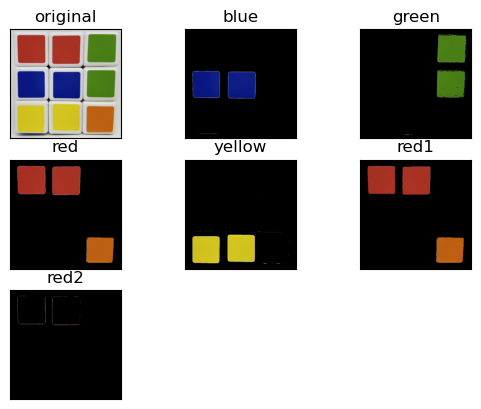

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정 # HSV
blue1 = np.array([90, 50, 50]) # H Hue S saturation V value 순서로 값이 선정되며 50 ~ 255를 기본값으로 이해하고 있는 게... => 실험해보고 최적값 찾는 게 중요
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50]) # red의 영역은 좌측편과 동일하며 이에 의해 연산을 1번 더 추가해주어야함
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow, 'red1':res_red1, 'red2':res_red2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(3,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

In [121]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
#--① 합성 대상 영상 읽기
img1 = cv2.imread("img/drawing.jpg")
img2= cv2.imread("img/my_hand.jpg")
print("img1",img1.shape)
print("img2",img2.shape)

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)
 
#--④ seamlessClone 으로 합성 
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
print('normal',normal.shape)

mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)
print('mixed',mixed.shape)

#--⑤ 결과 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

img1 (162, 200, 3)
img2 (450, 600, 3)
normal (450, 600, 3)
mixed (450, 600, 3)


In [137]:
img1.mean()

np.float64(255.0)

In [147]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
#--① 합성 대상 영상 읽기
img1 = cv2.imread("img/hunger.png")
img2= cv2.imread("img/my_hand.jpg")
print("img1",img1.shape)
print("img2",img2.shape)

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)
 
#--④ seamlessClone 으로 합성 
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
print('normal',normal.shape)

mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)
print('mixed',mixed.shape)

#--⑤ 결과 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

img1 (141, 337, 3)
img2 (450, 600, 3)
normal (450, 600, 3)
mixed (450, 600, 3)
